In [33]:
pip install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as pl
import csv
import numpy as np

# OpenMP APM

## Speed up plot with different pattern lengths

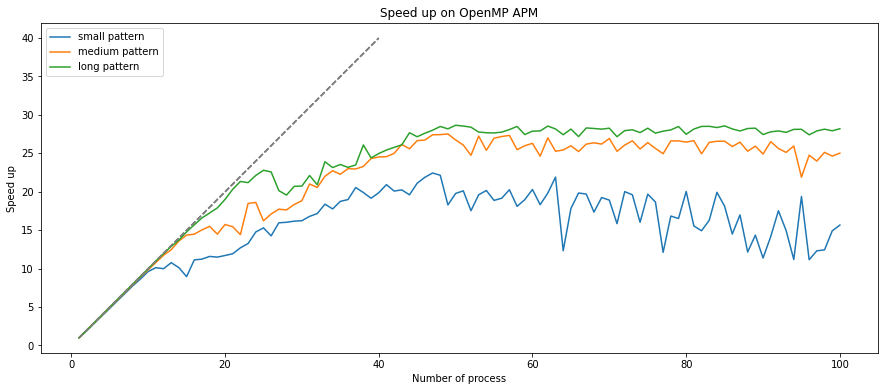

In [4]:
T_s = []
T_p = [[],[],[]]


with open('./apm/apm_omp/out_omp', 'r') as out_file:
    tsv_reader = csv.reader(out_file, delimiter='\t')
    first = True
    for row in tsv_reader :
        if first :
            first = False
            T_s = [float(row[i]) for i in range(3)]
        for j in range(3) :
            T_p[j].append(float(row[j]))

title = "Speed up on OpenMP APM"
N_p = 100  

labels = ["small pattern","medium pattern","long pattern"]
P_omp = [p for p in range(1,N_p + 1)]

for i in range(3) :
    S = list(map(lambda x : T_s[i]/x, T_p[i]))
    pl.figure(1, figsize=(15, 15))
    pl.plot(P_omp,S,label=labels[i])
    pl.plot(P_omp[:40],P_omp[:40],color="grey",linestyle='dashed')
    pl.axis('scaled')
    pl.xlabel('Number of process')
    pl.ylabel('Speed up')
    pl.legend(loc="upper left")
    pl.title(title)
    
pl.show()

## Average Speed up plot

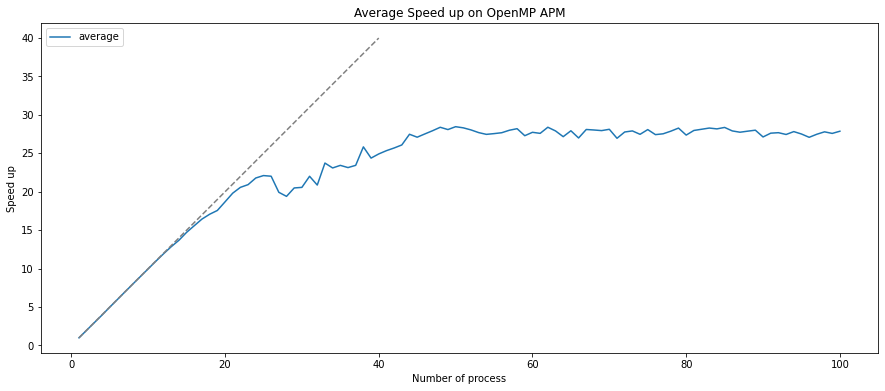

In [5]:
title = "Average Speed up on OpenMP APM"

T_sAVG = (T_s[0] + T_s[1]*3 + T_s[2]*7)/11
T_pAVG = [(T_p[0][i] + T_p[1][i]*3 + T_p[2][i]*7)/11 for i in range(len(T_p[0]))]

S_omp_AVG = list(map(lambda x : T_sAVG/x, T_pAVG))

pl.figure(1, figsize=(15, 15))
pl.plot(P_omp,S_omp_AVG,label="average")
pl.plot(P_omp[:40],P_omp[:40],color="grey",linestyle='dashed')

# log regression : not appropriated
# pmax_reg = 100
# x = np.array(P_omp[:pmax_reg])
# y = np.array(S_omp_AVG[:pmax_reg])
# reg_coef = np.polyfit(np.log(x), y, 1)
#
# X = np.linspace(0,100,1000)
# Y = [reg_coef[0]*np.log(x) + reg_coef[1] for x in X]
# pl.plot(X[1:],Y[1:],color="black",label="log regression")

pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)


pl.show()

# MPI APM

## Speed up plot with different pattern lengths

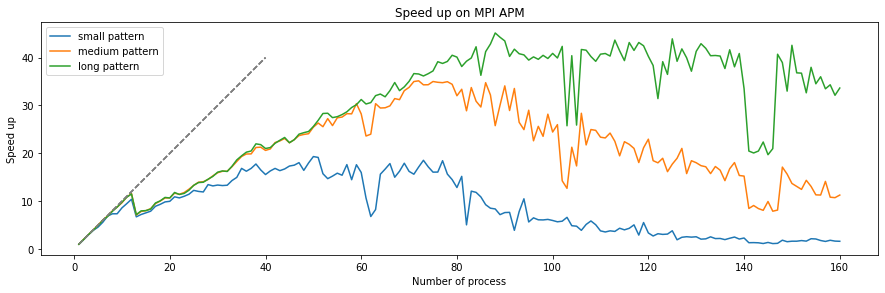

In [7]:
T_s = []
T_p = [[],[],[]]


with open('./apm/apm_mpi/out_mpi', 'r') as out_file:
    tsv_reader = csv.reader(out_file, delimiter='\t')
    first = True
    for row in tsv_reader :
        if first :
            first = False
            T_s = [float(row[i]) for i in range(3)]
        for j in range(3) :
            T_p[j].append(float(row[j]))

title = "Speed up on MPI APM"
N_p = 160  

labels = ["small pattern","medium pattern","long pattern"]
P_mpi = [p for p in range(1,N_p + 1)]

for i in range(3) :
    S = list(map(lambda x : T_s[i]/x, T_p[i]))
    pl.figure(1, figsize=(15, 15))
    pl.plot(P_mpi,S,label=labels[i])
    pl.plot(P_mpi[:40],P_mpi[:40],color="grey",linestyle='dashed')
    pl.axis('scaled')
    pl.xlabel('Number of process')
    pl.ylabel('Speed up')
    pl.legend(loc="upper left")
    pl.title(title)
    
pl.show()

## Average Speed up plot

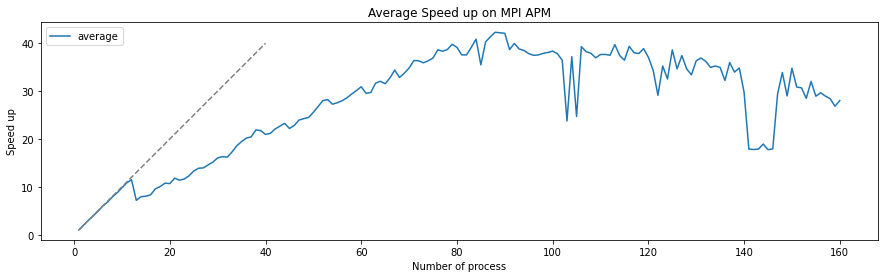

In [9]:
title = "Average Speed up on MPI APM"
T_sAVG = (T_s[0] + T_s[1]*3 + T_s[2]*7)/11
T_pAVG = [(T_p[0][i] + T_p[1][i]*3 + T_p[2][i]*7)/11 for i in range(len(T_p[0]))]

S_mpi_AVG = list(map(lambda x : T_sAVG/x, T_pAVG))

pl.figure(1, figsize=(15, 15))
pl.plot(P_mpi,S_mpi_AVG,label="average")
pl.plot(P_mpi[:40],P_mpi[:40],color="grey",linestyle='dashed')
pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)

pl.show()

## OpenMP / MPI Comparision

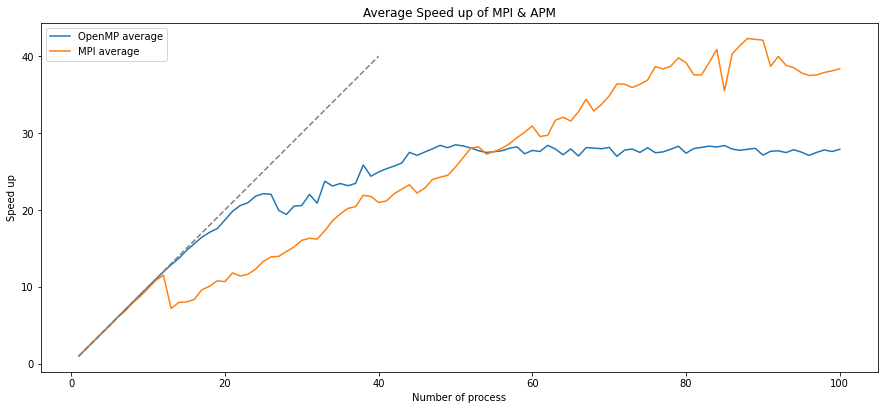

In [16]:
title = "Average Speed up of MPI & APM"

pmax = 100

pl.figure(1, figsize=(15, 15))
pl.plot(P_omp[:pmax],S_omp_AVG[:pmax],label="OpenMP average")
pl.plot(P_mpi[:pmax],S_mpi_AVG[:pmax],label="MPI average")
pl.plot(P_omp[:min(40,pmax)],P_omp[:min(40,pmax)],color="grey",linestyle='dashed')
pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)

pl.show()

# OpenMP + MPI APM 